In [10]:

from sklearn.datasets import load_iris
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

In [12]:

# 3.2 Compute and display MI scores
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 3.2 Compute and display ML scores
ml_scores = mutual_info_classif(X, y, random_state=42)
df_ml = pd.DataFrame({
    'feature': X.columns,  # Fixed: 'columns' not 'Columns'
    'ML_score': ml_scores
}).sort_values('ML_score', ascending=False)  # Moved sort_values into the chain

print("Mutual Information scores:\n", df_ml)


Mutual Information scores:
              feature  ML_score
2  petal length (cm)  0.992573
3   petal width (cm)  0.985643
0  sepal length (cm)  0.511365
1   sepal width (cm)  0.299424


3.3 Analysis
Explain how mutual information differs from correlation

In [19]:
from sklearn.feature_selection import f_classif
# 1. Compare to F-scores
f_scores, _ = f_classif(X, y)
ml_scores_df = pd.DataFrame({
    'feature': X.columns,
    'F_score': f_scores
}).sort_values('F_score', ascending=False)

merged = ml_scores_df.merge(df_ml, on='feature')
print(merged.sort_values(['F_score','ML_score'], ascending=False))

             feature      F_score  ML_score
0  petal length (cm)  1180.161182  0.992573
1   petal width (cm)   960.007147  0.985643
2  sepal length (cm)   119.264502  0.511365
3   sepal width (cm)    49.160040  0.299424


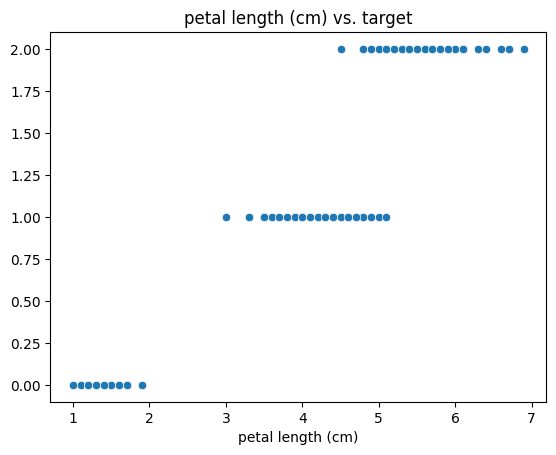

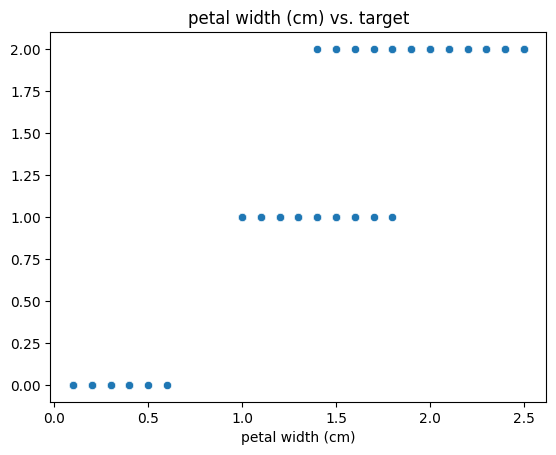

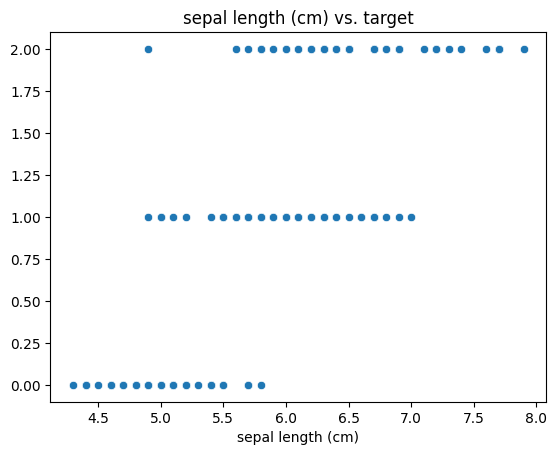

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Non-linear Effects

for feat in df_ml['feature'][:3]:
    sns.scatterplot(x=X[feat], y=y)
    plt.title(f"{feat} vs. target"); plt.show()

In [27]:

merged[['F_score','ML_score']].corr().iloc[0,1]

np.float64(0.9691248512491292)

The error `NameError: name 'X' is not defined` indicates that the variables `X` and `y` were used before they were assigned values.

To fix this, you need to load your data and define your feature matrix `X` and target variable `y` before running the cell that computes the mutual information scores.